<h1>Ejemplo ML con varios algoritmos</h1>

El presente notebook muestra un ejemplo de resolución de un mismo problema con varios algoritmos de machine learning. Con él se pretende ilustrar un poco la diferencia entre algoritmo y framework ML. El problema escogido es el problema de clasificación de dígitos MNIST, que es una especie de "Hello world" dentro del mundo del machine learning. Los algoritmos y frameworks utilizados serán:

<table style='{align:left;}'>
<tr><th>Algoritmo</th><th>Framework</th></tr>
<tr><td>Random Forests</td><td>Scikit-Learn</td></tr>
<tr><td>Convolutional Neural Network</td><td>Keras sobre Tensorflow</td></tr>
</table>

En primer lugar, vamos a importar una serie de paquetes comunes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importamos el dataset MNIST de Keras, que usaremos para todos los algoritmos

from keras.datasets import mnist   # La mayoría de los frameworks incluyen el dataset MNIST

Using TensorFlow backend.


In [2]:
# Cargamos los datos divididos en train y test data

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


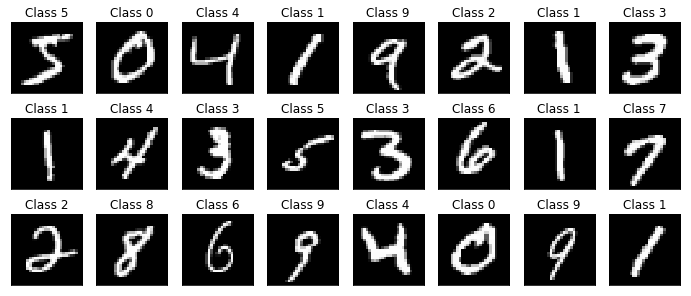

In [3]:
# Echemos un vistazo a unas cuantas imágenes

plt.subplots(3,8, figsize=(12,5))
for i in range(24):
    plt.subplot(3,8,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation=None)
    plt.xticks([])
    plt.yticks([])
    plt.title('Class {}'.format(y_train[i]))

<h2>Random Forests</h2>

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [5]:
# El RF espera los arrays de dos dimensiones
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

In [7]:
%%time
# Creamos un RF con 100 estimadores y lo entrenamos
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

Wall time: 52.1 s


In [8]:
# Vamos a evaluar la precisión del algoritmo
y_pred = rf.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.9695


<h2>Convolutional NN</h2>

In [9]:
# Imports de módulos Keras

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [10]:
# Primero tenemos que hacer un preprocesado previo de las imágenes

# Volvemos a cargar los datos para procesarlos para la CNN
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Cambiar el tamaño al esperado por la CNN
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# Normalizar (escala de grises)
X_train /= 255
X_test /= 255

# OHE (One Hot Encoding) de las etiquetas
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:
def build_model():
    model = Sequential()
    model.add(Convolution2D(32, kernel_size=(3,3), input_shape=(28, 28, 1)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [12]:
# Creamos y entrenamos la red

model = build_model()
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 39s - loss: 0.3345 - acc: 0.9005 - val_loss: 0.0851 - val_acc: 0.9741
Epoch 2/10
60000/60000 [==============================] - 39s - loss: 0.1246 - acc: 0.9632 - val_loss: 0.0606 - val_acc: 0.9801
Epoch 3/10
60000/60000 [==============================] - 38s - loss: 0.0943 - acc: 0.9716 - val_loss: 0.0498 - val_acc: 0.9838
Epoch 4/10
60000/60000 [==============================] - 38s - loss: 0.0787 - acc: 0.9758 - val_loss: 0.0471 - val_acc: 0.9834
Epoch 5/10
60000/60000 [==============================] - 38s - loss: 0.0698 - acc: 0.9786 - val_loss: 0.0405 - val_acc: 0.9862
Epoch 6/10
60000/60000 [==============================] - 38s - loss: 0.0614 - acc: 0.9813 - val_loss: 0.0386 - val_acc: 0.9863
Epoch 7/10
60000/60000 [==============================] - 39s - loss: 0.0564 - acc: 0.9822 - val_loss: 0.0352 - val_acc: 0.9877
Epoch 8/10
60000/60000 [==============================

In [13]:
# Vamos a probar el algoritmo una vez entrenado con imágenes del test set

_, (test, _) = mnist.load_data()

El modelo predice que es un 8


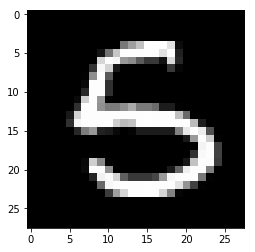

In [24]:
n = 319

plt.imshow(test[n], cmap='gray', interpolation=None)
sample = test[n].reshape(1, 28, 28, 1)
predict = model.predict(sample)
print('El modelo predice que es un {}'.format(predict.argmax()))